## UCI_HAR_Dataset - Preprocessing :


In [1]:
import numpy as np
import pandas as pd

# get the features from the file features.txt
features = list()
with open('UCI_HAR_Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))


No of Features: 561


## Duplicate features:

In [3]:
if len(features) != len(set(features)):
    print("Duplicate feature names found!")


Duplicate feature names found!


In [4]:
from collections import Counter
# Count occurrences of each feature name
feature_counts = Counter(features)

# Identify and print duplicate feature names
duplicates = {name: count for name, count in feature_counts.items() if count > 1}

if duplicates:
    print("Duplicate feature names found:")
    for name, count in duplicates.items():
        print(f"{name}: {count} times")
else:
    print("No duplicate feature names found.")

Duplicate feature names found:
fBodyAcc-bandsEnergy()-1,8: 3 times
fBodyAcc-bandsEnergy()-9,16: 3 times
fBodyAcc-bandsEnergy()-17,24: 3 times
fBodyAcc-bandsEnergy()-25,32: 3 times
fBodyAcc-bandsEnergy()-33,40: 3 times
fBodyAcc-bandsEnergy()-41,48: 3 times
fBodyAcc-bandsEnergy()-49,56: 3 times
fBodyAcc-bandsEnergy()-57,64: 3 times
fBodyAcc-bandsEnergy()-1,16: 3 times
fBodyAcc-bandsEnergy()-17,32: 3 times
fBodyAcc-bandsEnergy()-33,48: 3 times
fBodyAcc-bandsEnergy()-49,64: 3 times
fBodyAcc-bandsEnergy()-1,24: 3 times
fBodyAcc-bandsEnergy()-25,48: 3 times
fBodyAccJerk-bandsEnergy()-1,8: 3 times
fBodyAccJerk-bandsEnergy()-9,16: 3 times
fBodyAccJerk-bandsEnergy()-17,24: 3 times
fBodyAccJerk-bandsEnergy()-25,32: 3 times
fBodyAccJerk-bandsEnergy()-33,40: 3 times
fBodyAccJerk-bandsEnergy()-41,48: 3 times
fBodyAccJerk-bandsEnergy()-49,56: 3 times
fBodyAccJerk-bandsEnergy()-57,64: 3 times
fBodyAccJerk-bandsEnergy()-1,16: 3 times
fBodyAccJerk-bandsEnergy()-17,32: 3 times
fBodyAccJerk-bandsEnergy()

## Converting into unique features:

In [7]:
seen = {}
uniq_features = []
for idx, x in enumerate(features):
    if x not in seen:
        uniq_features.append(x)
        seen[x] = 1
    else:
        uniq_features.append(x + 'n'*seen[x])
        seen[x] += 1
len(uniq_features)

561

In [8]:
print(uniq_features[300:346])

['fBodyAcc-skewness()-Z', 'fBodyAcc-kurtosis()-Z', 'fBodyAcc-bandsEnergy()-1,8', 'fBodyAcc-bandsEnergy()-9,16', 'fBodyAcc-bandsEnergy()-17,24', 'fBodyAcc-bandsEnergy()-25,32', 'fBodyAcc-bandsEnergy()-33,40', 'fBodyAcc-bandsEnergy()-41,48', 'fBodyAcc-bandsEnergy()-49,56', 'fBodyAcc-bandsEnergy()-57,64', 'fBodyAcc-bandsEnergy()-1,16', 'fBodyAcc-bandsEnergy()-17,32', 'fBodyAcc-bandsEnergy()-33,48', 'fBodyAcc-bandsEnergy()-49,64', 'fBodyAcc-bandsEnergy()-1,24', 'fBodyAcc-bandsEnergy()-25,48', 'fBodyAcc-bandsEnergy()-1,8n', 'fBodyAcc-bandsEnergy()-9,16n', 'fBodyAcc-bandsEnergy()-17,24n', 'fBodyAcc-bandsEnergy()-25,32n', 'fBodyAcc-bandsEnergy()-33,40n', 'fBodyAcc-bandsEnergy()-41,48n', 'fBodyAcc-bandsEnergy()-49,56n', 'fBodyAcc-bandsEnergy()-57,64n', 'fBodyAcc-bandsEnergy()-1,16n', 'fBodyAcc-bandsEnergy()-17,32n', 'fBodyAcc-bandsEnergy()-33,48n', 'fBodyAcc-bandsEnergy()-49,64n', 'fBodyAcc-bandsEnergy()-1,24n', 'fBodyAcc-bandsEnergy()-25,48n', 'fBodyAcc-bandsEnergy()-1,8nn', 'fBodyAcc-bandsEn

## Obtain the  train data 

In [10]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('UCI_HAR_dataset/train/X_train.txt', delim_whitespace=True, header=None, names=uniq_features)

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('UCI_HAR_dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('UCI_HAR_dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

C:\Users\user\AppData\Local\Temp\ipykernel_8008\1343392438.py:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  X_train['subject'] = pd.read_csv('UCI_HAR_dataset/train/subject_train.txt', header=None, squeeze=True)
C:\Users\user\AppData\Local\Temp\ipykernel_8008\1343392438.py:7: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_train = pd.read_csv('UCI_HAR_dataset/train/y_train.txt', names=['Activity'], squeeze=True)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
5773,0.275922,-0.01722,-0.113317,-0.987259,-0.994918,-0.991163,-0.988266,-0.994524,-0.991631,-0.927938,...,0.381526,-0.624144,0.202483,-0.448475,0.679777,-0.582505,-0.415626,26,6,LAYING


In [12]:
train.shape

(7352, 564)

## Obtain the  test data 

In [14]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('UCI_HAR_dataset/test/X_test.txt', delim_whitespace=True, header=None, names=uniq_features)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('UCI_HAR_dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('UCI_HAR_dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

C:\Users\user\AppData\Local\Temp\ipykernel_8008\3091157722.py:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  X_test['subject'] = pd.read_csv('UCI_HAR_dataset/test/subject_test.txt', header=None, squeeze=True)
C:\Users\user\AppData\Local\Temp\ipykernel_8008\3091157722.py:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_test = pd.read_csv('UCI_HAR_dataset/test/y_test.txt', names=['Activity'], squeeze=True)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
1230,0.295573,-0.011682,-0.12501,-0.993026,-0.98931,-0.951979,-0.994155,-0.98903,-0.949167,-0.9279,...,-0.206955,0.152585,0.170258,-0.130286,-0.505722,-0.138834,-0.231813,12,4,SITTING


In [15]:
test.shape

(2947, 564)

# Data Cleaning

## 1. Check for Duplicates

In [16]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


## 2. Checking for NaN/null values

In [17]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


## 3. Check for data imbalance

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

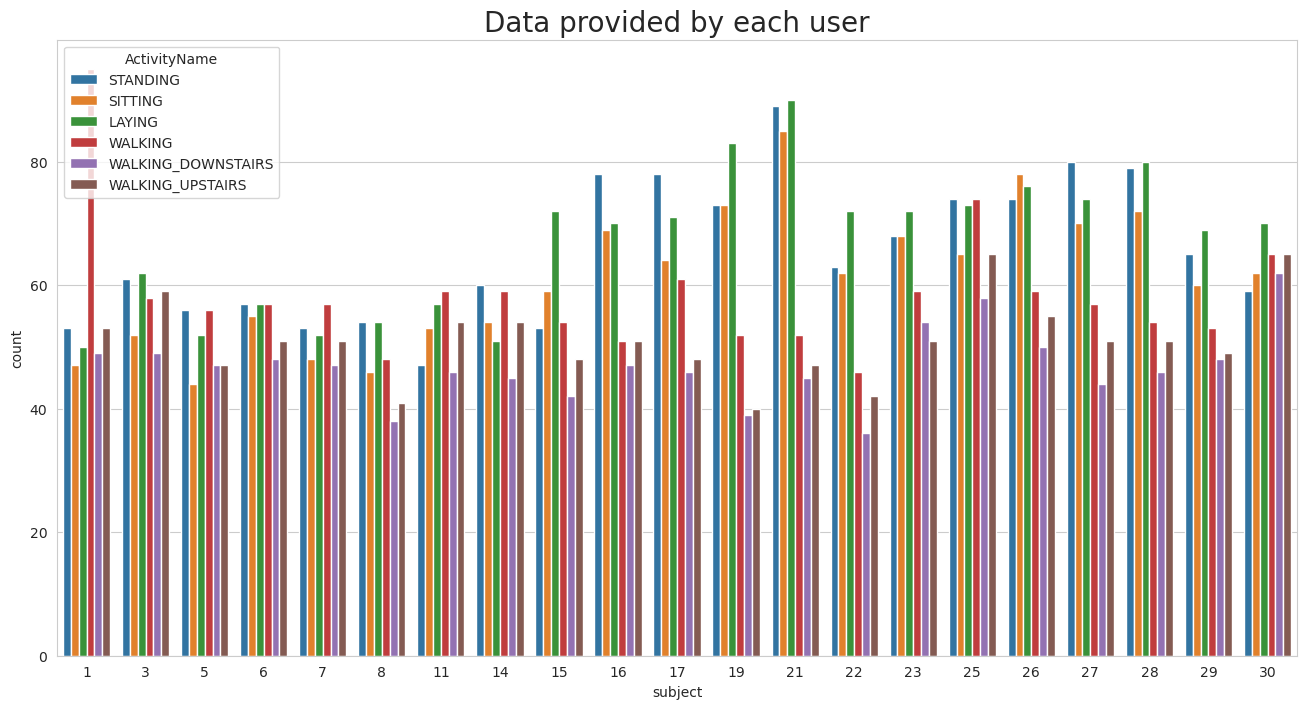

In [19]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()


> We have got almost same number of reading from all the subjects

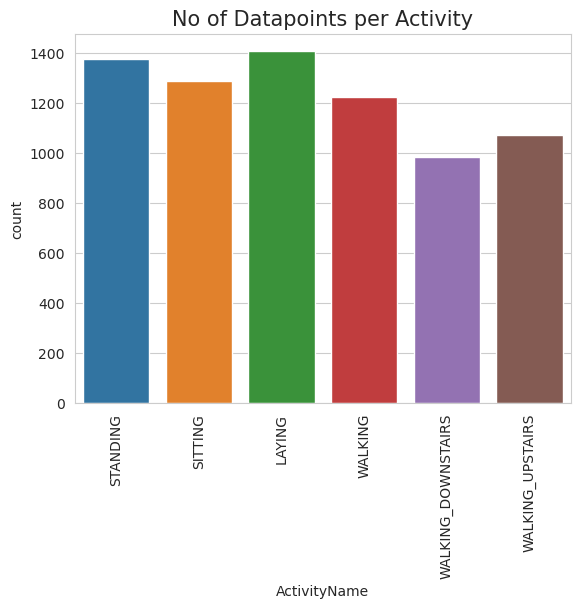

In [22]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(x='ActivityName', data=train)
plt.xticks(rotation=90)
plt.show()

### Observation
> Our data is well balanced (almost)

## 4. Changing feature names 

In [23]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

C:\Users\user\AppData\Local\Temp\ipykernel_8008\71913079.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[()]','')
C:\Users\user\AppData\Local\Temp\ipykernel_8008\71913079.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[-]', '')
C:\Users\user\AppData\Local\Temp\ipykernel_8008\71913079.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  columns = columns.str.replace('[,]','')


Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

## 5. Save this dataframe in a csv files

In [24]:
train.to_csv('UCI_HAR_Dataset/csv_files/train.csv', index=False)
test.to_csv('UCI_HAR_Dataset/csv_files/test.csv', index=False)

# Exploratory Data Analysis

### 1. Featuring Engineering from Domain Knowledge 




+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.




### 2. Stationary and Moving activities are completely different

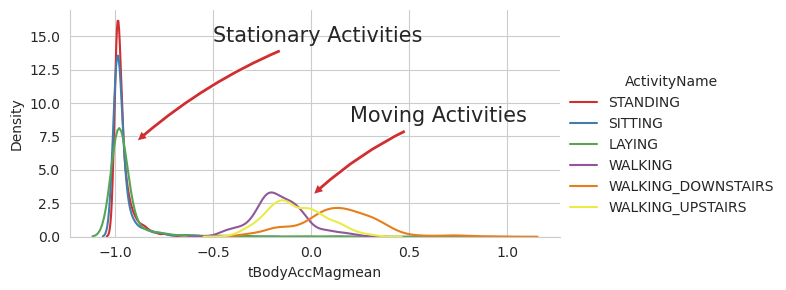

In [44]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', aspect=2)
facetgrid.map(sns.kdeplot,'tBodyAccMagmean', fill=False, common_norm=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.9,7), xytext=(-0.5, 15), size=15,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=15,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

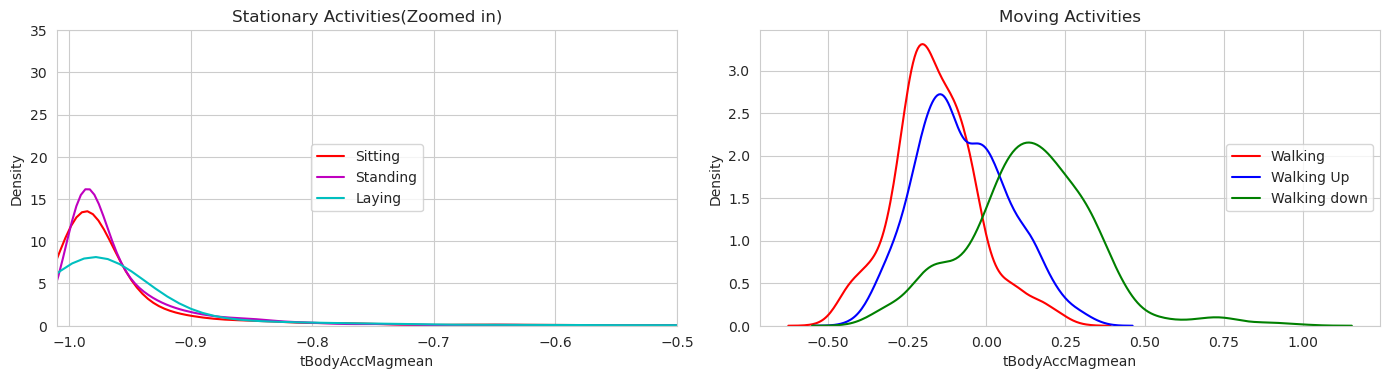

In [38]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.kdeplot(df4['tBodyAccMagmean'],color = 'r', fill=False, common_norm=False, label = 'Sitting')
sns.kdeplot(df5['tBodyAccMagmean'],color = 'm',fill=False, common_norm=False, label = 'Standing')
sns.kdeplot(df6['tBodyAccMagmean'],color = 'c',fill=False, common_norm=False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.kdeplot(df1['tBodyAccMagmean'],color = 'red',fill=False, common_norm=False, label = 'Walking')
sns.kdeplot(df2['tBodyAccMagmean'],color = 'blue',fill=False, common_norm=False,label = 'Walking Up')
sns.kdeplot(df3['tBodyAccMagmean'],color = 'green',fill=False, common_norm=False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

### 3. Magnitude of an acceleration can saperate it well

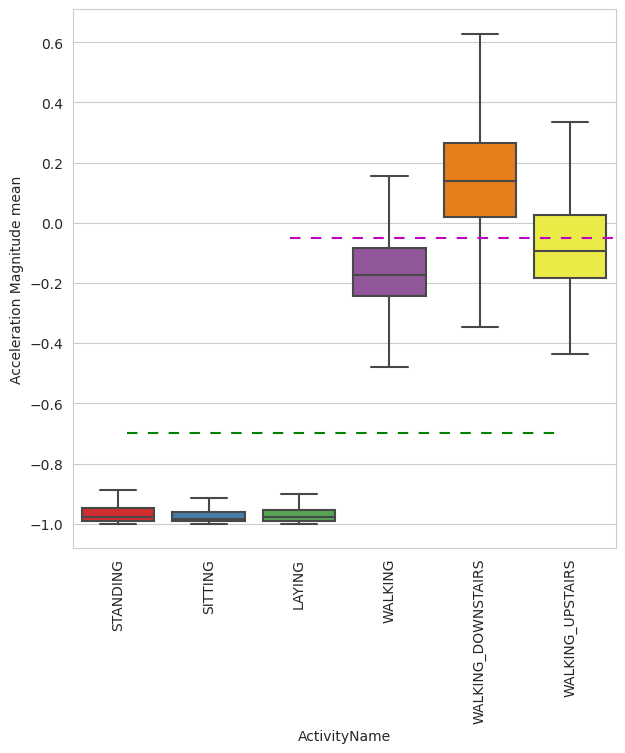

In [27]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

__ Observations__:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### 4. Position of GravityAccelerationComponants also matters 

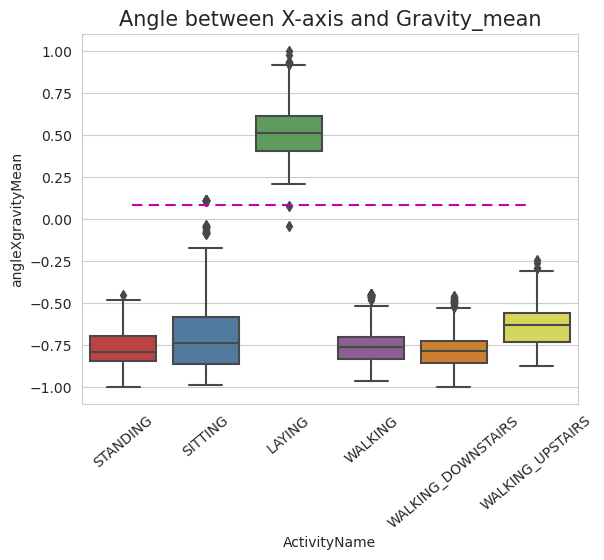

In [28]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

__ Observations__:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

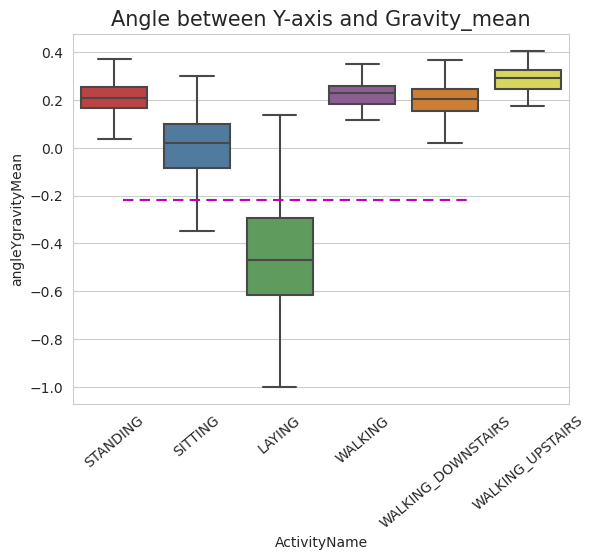

In [29]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# Apply t-sne on the data 

In [30]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.074s...
[t-SNE] Computed neighbors for 7352 samples in 2.780s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.597443
[t-SNE] Computed conditional probabilities in 0.040s
[t-SNE] Iteration 50: error = 119.3417664, gradient norm = 0.0488085 (50 iterations in 7.460s)
[t-SNE] Iteration 100: error = 105.0222702, gradient norm = 0.0239013 (50 iterations in 

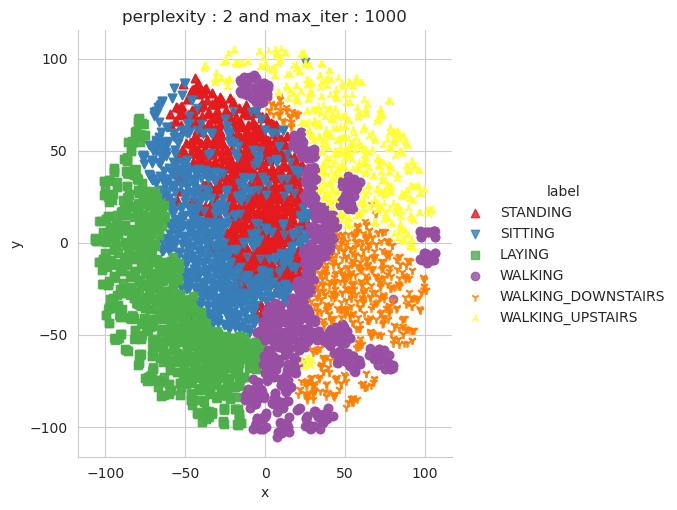

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.078s...
[t-SNE] Computed neighbors for 7352 samples in 2.937s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.072s
[t-SNE] Iteration 50: error = 107.1337967, gradient norm = 0.0397592 (50 iterations in 8.415s)
[t-SNE] Iteration 100: error = 95.7015228, gradient norm = 0.0137873 (50 iteration

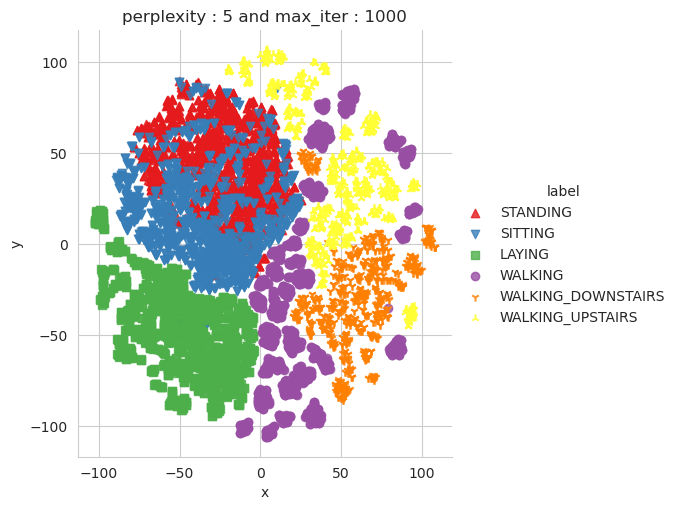

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.074s...
[t-SNE] Computed neighbors for 7352 samples in 3.034s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.153s
[t-SNE] Iteration 50: error = 97.8927841, gradient norm = 0.0349535 (50 iterations in 8.462s)
[t-SNE] Iteration 100: error = 88.9319763, gradient norm = 0.0116565 (50 iteration

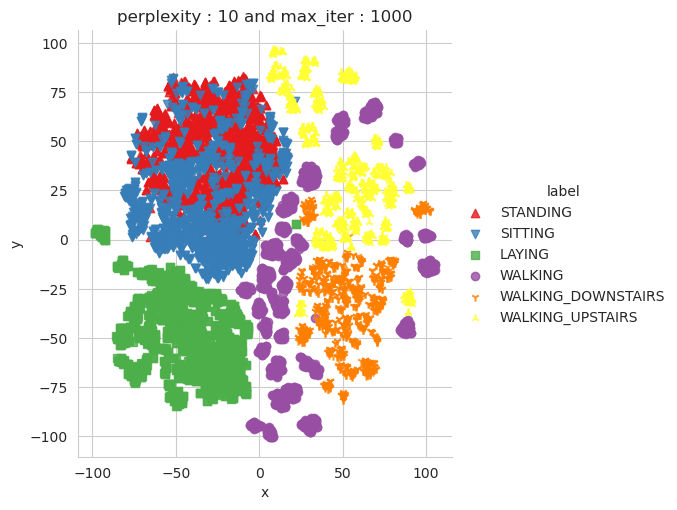

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.069s...
[t-SNE] Computed neighbors for 7352 samples in 2.894s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.302s
[t-SNE] Iteration 50: error = 89.2819977, gradient norm = 0.0291338 (50 iterations in 9.380s)
[t-SNE] Iteration 100: error = 82.9579010, gradient norm = 0.0078789 (50 iteration

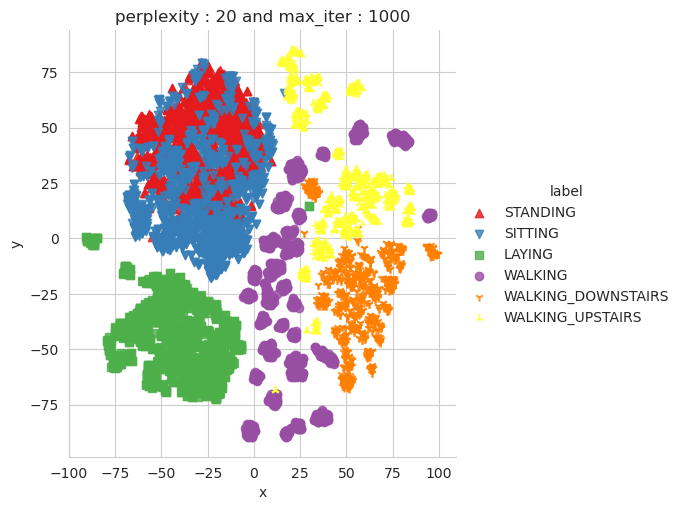

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.077s...
[t-SNE] Computed neighbors for 7352 samples in 3.208s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.713s
[t-SNE] Iteration 50: error = 78.8211212, gradient norm = 0.0248900 (50 iterations in 14.494s)
[t-SNE] Iteration 100: error = 75.2269135, gradient norm = 0.0052959 (50 iterati

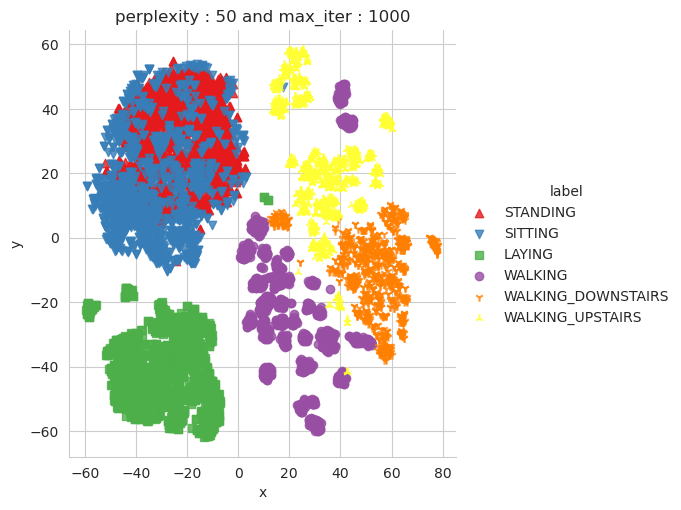

Done


In [35]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])